# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [2]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [3]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [4]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

In [17]:
from sklearn.model_selection import train_test_split, cross_validate # 划分数据集函数
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 2020
# 划分训练集和测试集
def split(X, Y, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=RANDOM_SEED)
    return x_train, x_test, y_train, y_test

In [18]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = split(X, Y)
linreg.fit(x_train, y_train)
print(linreg.intercept_, linreg.coef_)

65.55424256838295 [-6.17588386e-02  2.82375384e-04  1.31975766e-05 -7.20591259e-03
  6.57612914e-04 -6.55744975e-03 -2.65494903e-03 -2.42756500e-03]


可以看到截距为65.55， 各个特征的系数分别为 [-6.17588386e-02  2.82375384e-04  1.31975766e-05 -7.20591259e-03
  6.57612914e-04 -6.55744975e-03 -2.65494903e-03 -2.42756500e-03]
都是负数，因为表现越好则排名越低，是一种负相关的关系。

#### 线性回归baseline

In [19]:
y_pred = linreg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.9990456867487096


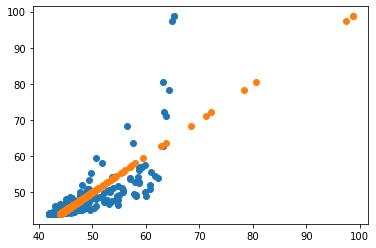

In [20]:
plt.scatter(y_pred, y_test, marker='o')
plt.scatter(y_test, y_test)
plt.show()

可以看出拟合效果一般，下面将从特征工程和模型调优两个方面进行优化

#### 特征工程

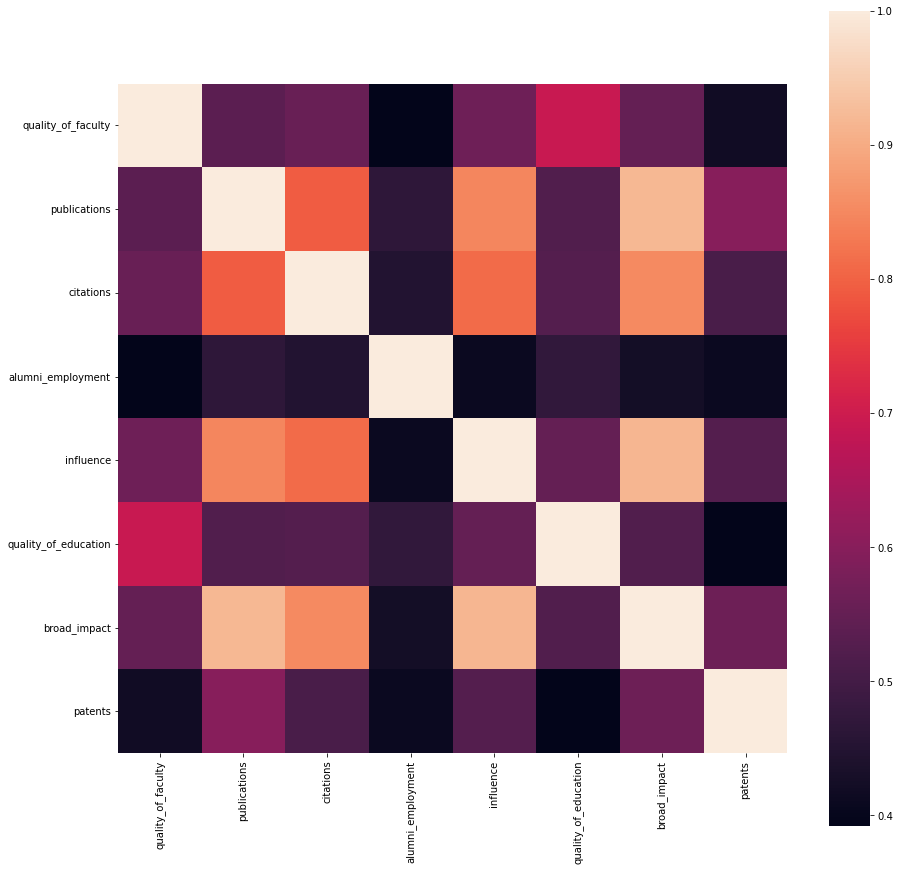

In [21]:
# 相关系数图
def draw_corr_pic(x):
    corrm = x.corr()
    plt.subplots(figsize=(15, 15))
    sns.heatmap(corrm, square=True)
    plt.show()
draw_corr_pic(X)

可以看出 broad_impact，influence 的相关性很高，所以可以只保留其中一个特征，我这边保留influence

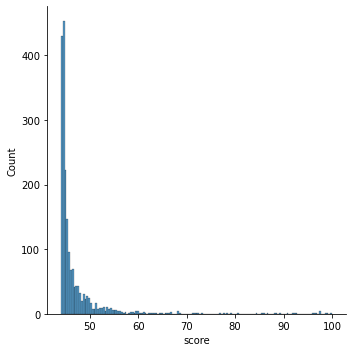

In [22]:
sns.displot(Y)
plt.show()

排名数据排后面的较多，分布呈右偏，可以采用取对数进行部分修正

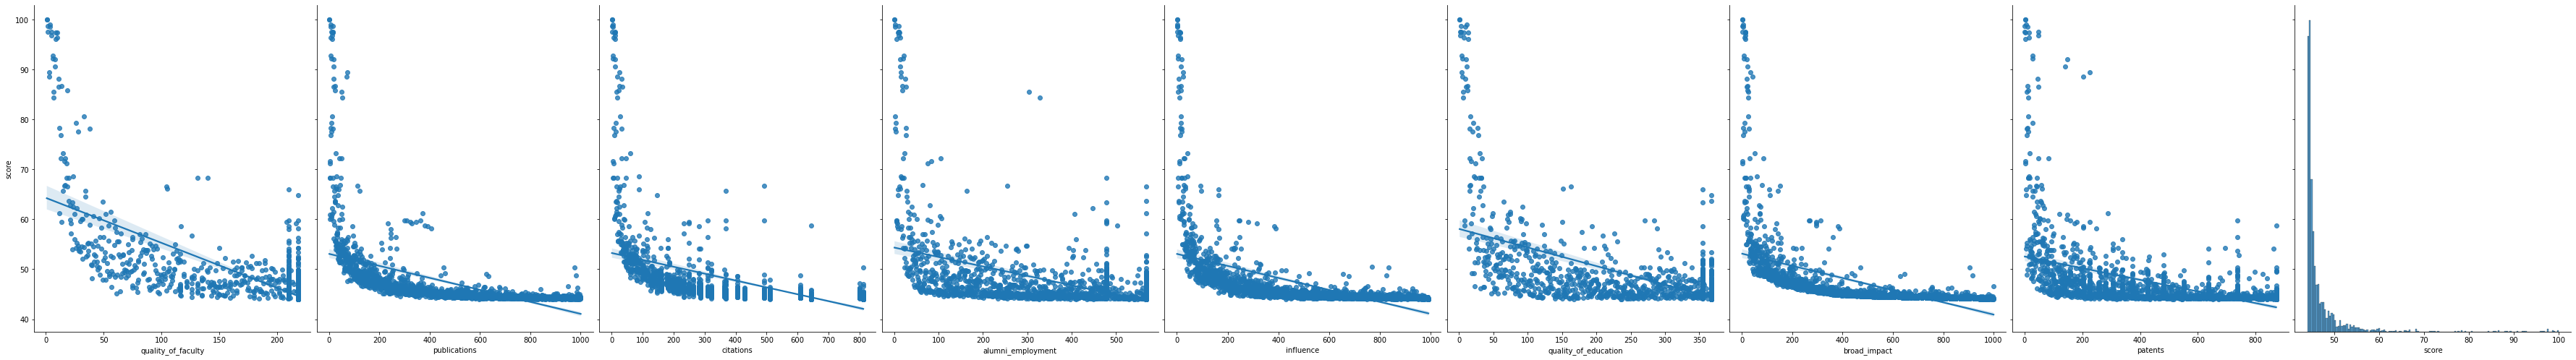

In [23]:
sns.pairplot(pd.concat([X, Y], axis=1), y_vars='score', height= 7 ,aspect = 0.8, kind='reg')

从数据分布在中看出X的各特征和Y线性关系都很薄弱，而线性回归的假设是两者具有线性关系。这里我采用log变换，查看变换后的是否具有线性关系。

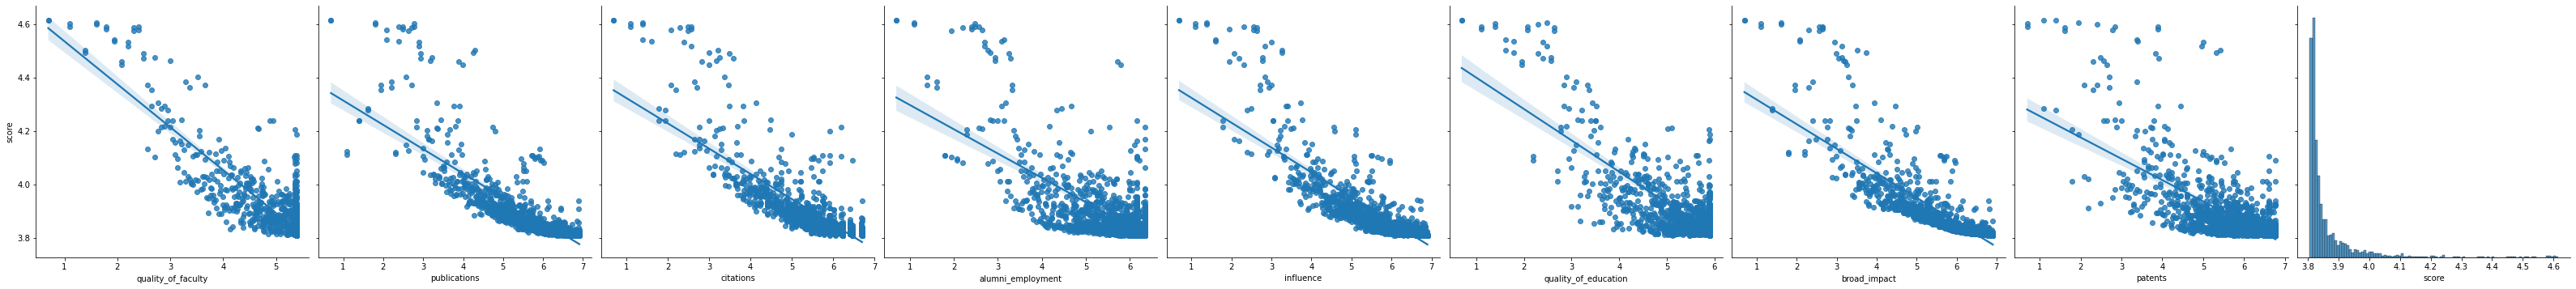

In [24]:
sns.pairplot(pd.concat([np.log1p(X), np.log1p(Y)], axis=1), y_vars='score', height = 5, kind='reg')

可以看出都具有了线性关系。

In [37]:
new_X = X.copy()

In [38]:
new_X = np.log1p(new_X.drop(["influence"], axis =1))
new_Y = np.log1p(Y)

In [39]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = split(new_X, new_Y)
linreg.fit(x_train, y_train)
print(linreg.intercept_, linreg.coef_)

4.7747039360744665 [-0.07388521 -0.0059417   0.00092726 -0.03081863 -0.02083327 -0.0220388
 -0.01276995]


调整特征后，截距和系数变小了。

In [40]:
y_pred = linreg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)) )

1.7785045612562305


可以看出效果比最初的要好

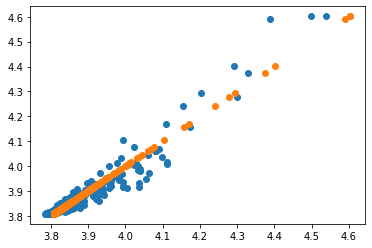

In [41]:
plt.scatter(y_pred, y_test, marker='o')
plt.scatter(y_test, y_test)
plt.show()

#### 模型调优

线性回归还提供了岭回归与Lasso回归，来解决线性回归出现的过拟合问题

In [42]:
# 岭回归
rideg = Ridge(alpha=0.0001)
rideg.fit(x_train, y_train)
y_pred = rideg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)) )

1.7785046712719497


In [43]:
#Lasso 回归
lasso = Lasso(alpha=0.00001, fit_intercept=True)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)) )

1.7784124032883428


结果与普通线性回归相差不大，不过还有调参优化的空间。

### 总结
本次实验使用线性回归模型来分析大学综合得分，采用 RMSE 作为评价指标。由于预测的结果是大学排名，而特征是大学各方面的表现，表现好的则排名会低，所以线性回归模型的系数都是负数。一开始直接在数据集上使用线性回归的RMSE是3.999，后面通过绘制分布图，分析得出特征和目标值并没有很好的线性关系，因此采用取对数的方法进行优化，得出的预测结果为1.778。最后采用线性回归的岭回归和Lasso回归分析，结果上看没有改善，但是还有调差优化的空间。